#  **`Sequence-based predictor for the impact of  mutation on protein stability üß¨üß¨üß¨üß¨üß¨`**


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
os.chdir('/gdrive/My Drive/MPDS2/projet1')

OSError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install biopandas

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 879.0/879.0 kB 4.7 MB/s eta 0:00:00


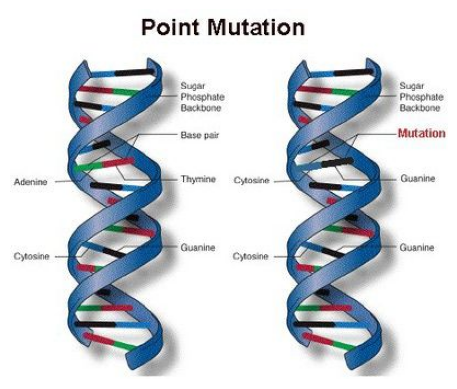

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Charger l'image
image = mpimg.imread("/content/drive/MyDrive/projet1/mutation.jpg")

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Masquer les axes
plt.show()


### **importation des biblioth√®ques üìö :**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from biopandas.pdb import PandasPdb
import plotly.express as px
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

import xgboost
from sklearn.metrics import mean_squared_error as MSE
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [ ]:
!pip install biopandas


In [ ]:
!ls -l

total 8
drwx------ 5 root root 4096 Dec 14 19:23 drive
drwxr-xr-x 1 root root 4096 Dec 13 14:22 sample_data


In [ ]:
PDB_FILE = "1gyz.pdb"

### **Chargement des embeddings**

In [ ]:
# Chargement des embeddings des s√©quences sauvages (wt) et mut√©es (mut)
wt_emb = torch.load("train_train_wt.pt")
mut_emb = torch.load("train_train_mut.pt")
df = pd.read_csv("train.csv")
print("Embeddings et Donn√©es Charg√©s avec Succ√®s")

Embeddings et Donn√©es Charg√©s avec Succ√®s


#### **Afficher les premi√®res lignes**

In [ ]:
# Affichage des premiers √©l√©ments des tensors
print("Embeddings pour les s√©quences sauvages (wt) :\n", wt_emb[:5])
print("\nEmbeddings pour les s√©quences mut√©es (mut) :\n", mut_emb[:5])

Embeddings pour les s√©quences sauvages (wt) :
 tensor([[-0.0632,  1.8905,  1.0130,  ...,  1.7288, -2.4825,  0.3187],
        [-0.0632,  1.8905,  1.0130,  ...,  1.7288, -2.4825,  0.3187],
        [-0.0632,  1.8905,  1.0130,  ...,  1.7288, -2.4825,  0.3187],
        [-0.0632,  1.8905,  1.0130,  ...,  1.7288, -2.4825,  0.3187],
        [-0.0632,  1.8905,  1.0130,  ...,  1.7288, -2.4825,  0.3187]])

Embeddings pour les s√©quences mut√©es (mut) :
 tensor([[ 0.0070,  1.9001,  1.0074,  ...,  1.6119, -2.3543,  0.3594],
        [ 0.0423,  1.9433,  0.9595,  ...,  1.7695, -2.4142,  0.3128],
        [ 0.0293,  1.9336,  1.0884,  ...,  1.6638, -2.3769,  0.3196],
        [-0.1233,  2.0180,  1.0377,  ...,  1.6911, -2.2926,  0.3670],
        [ 0.0676,  1.9103,  1.0881,  ...,  1.6339, -2.3799,  0.2853]])


In [ ]:
df.head()

### **Analyse de la Distribution de la Colonne 'ddg' - Stabilit√© des Variantes Prot√©iques**

Ce code utilise la biblioth√®que Plotly pour cr√©er un histogramme illustrant la distribution des valeurs de la colonne 'ddg' √† partir d'un DataFrame.

L'histogramme est interpr√©t√© comme une repr√©sentation visuelle de la stabilit√© des variants prot√©iques, o√π des valeurs plus √©lev√©es de 'ddg' indiquent une stabilit√© accrue.

In [ ]:

fig=go.Figure()
colors=["#FFD43B",'#002EFF']

i=0

fig.add_trace(
    go.Histogram(x=df['ddg'],
                 name='ddg',
                 hovertemplate='target column'+'%{y::2f}',
                 marker=dict(color=colors[i])
                )
)
fig.update_xaxes(
        title_text='Target column',
        title_font_color=colors[i],
        tickfont_color=colors[i])
fig.update_yaxes(
        title_text='Frequency',
        title_font_color=colors[i],
        tickfont_color=colors[i])

fig.update_layout(height=800,
                  width=800,
                  title_text='Target Column: Higher ddg means the protien variant is more stable',
                  template="plotly_dark",
                  xaxis=dict(color="#FF9300"),
                  yaxis=dict(color="#FF9300"))
fig.update_traces(marker_line_width=0.1,marker_line_color=colors[1])
fig.show()

NameError: ignored

#### **Analyse de la Longueur des S√©quences Sauvages et Mut√©es - Entra√Ænement**

 l'objectif de cette partie du code est d'examiner la longueur des s√©quences sauvages et mut√©es dans l'ensemble de donn√©es d'entra√Ænement.

In [ ]:
df['wt_seq_len']=df['wt_seq'].apply(lambda x:len(x))
df['mut_seq_len']=df['mut_seq'].apply(lambda x:len(x))
print('---------TRAIN--------')
display(df[['wt_seq_len','mut_seq_len']].describe())
print('---------TEST--------')
display(df[['wt_seq_len','mut_seq_len']])


---------TRAIN--------


wt_seq_len    mut_seq_len
count  339778.000000  339778.000000
mean       55.318682      55.318682
std        10.467515      10.467515
min        30.000000      30.000000
25%        43.000000      43.000000
50%        56.000000      56.000000
75%        64.000000      64.000000
max        72.000000      72.000000

---------TEST--------


wt_seq_len  mut_seq_len
0               59           59
1               59           59
2               59           59
3               59           59
4               59           59
...            ...          ...
339773          48           48
339774          48           48
339775          48           48
339776          48           48
339777          48           48

[339778 rows x 2 columns]

#### **Histogramme de la Longueur des S√©quences Sauvages - Plage entre 25 et 75**
l'histogramme repr√©sente la distribution des longueurs des s√©quences sauvages, avec une plage sp√©cifique entre 25 et 75. Cela offre une visualisation claire de la variabilit√© des longueurs de s√©quences dans le DataFrame.

In [ ]:
fig = go.Figure()
colors = ["#FF00F0", "#BD00FF"]

i = 0
# Add one subplot
fig.add_trace(
    go.Histogram(x=df["wt_seq_len"],
               name="wt_seq_len",
               hovertemplate = 'Protein Sequence Length:  %{x:.2f}' + '<br>Frequency: %{y:.2f}</br>',
               marker=dict(color=colors[i])
              )
)
fig.update_xaxes(
    title_text="Protein Sequence Length",
    title_font_color=colors[i],
    tickfont_color=colors[i],
    range=[25, 75]
)
fig.update_yaxes(
    title_text = "Frequency",
    title_font_color=colors[i],
    tickfont_color=colors[i]
)

fig.update_layout(height=800,
                  width=1000,
                  title_text="Wild Type sequence. Length Histogram.",
                  template="plotly_dark",
                  xaxis=dict(color="#FF9300"),
                  yaxis=dict(color="#FF9300"))
fig.update_traces(marker_line_width=2,marker_line_color=colors[1])
fig.show()

# ***Qu‚Äôest-ce que le format de fichier PDB¬∂***
Le format de fichier Protein Data Bank (pdb) est un format de fichier texte d√©crivant les structures tridimensionnelles des mol√©cules contenues dans la Protein Data Bank. Le format pdb permet donc la description et l'annotation des structures de prot√©ines et d'acides nucl√©iques, y compris les coordonn√©es atomiques, les affectations de structures secondaires, ainsi que la connectivit√© atomique.

La Protein Data Bank (PDB) est une base de donn√©es contenant les donn√©es structurelles tridimensionnelles de grandes mol√©cules biologiques, telles que les prot√©ines et les acides nucl√©iques.

In [ ]:

PDB_FILE = "1gyz.pdb"
pdb_df =  PandasPdb().read_pdb(PDB_FILE)
pdb_df.df.keys()


dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [ ]:
def sep():
    print('-'*100)

In [ ]:
atom_df=pdb_df.df['ATOM']
hetatm_df=pdb_df.df['HETATM']
anisou_df=pdb_df.df['ANISOU']
others_df=pdb_df.df['OTHERS']
print(f"ATOM dataset is of shape: {atom_df.shape}"), sep()
print(f"HETATM dataset is of shape: {hetatm_df.shape}"), sep()
print(f"ANISOU dataset is of shape: {anisou_df.shape}"), sep()
print(f"OTHERS dataset is of shape: {others_df.shape}"), sep()

display(atom_df.head())
display(hetatm_df.head())
display(anisou_df.head())
display(others_df.head())

ATOM dataset is of shape: (19460, 21)
----------------------------------------------------------------------------------------------------
HETATM dataset is of shape: (0, 21)
----------------------------------------------------------------------------------------------------
ANISOU dataset is of shape: (0, 21)
----------------------------------------------------------------------------------------------------
OTHERS dataset is of shape: (433, 3)
----------------------------------------------------------------------------------------------------


record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
0        ATOM            1                 N                  TRP           
1        ATOM            2                CA                  TRP           
2        ATOM            3                 C                  TRP           
3        ATOM            4                 O                  TRP           
4        ATOM            5                CB                  TRP           

  chain_id  residue_number insertion  ... x_coord  y_coord  z_coord  \
0        A              59            ...  -3.184  -12.243    0.073   
1        A              59            ...  -2.435  -10.968    0.095   
2        A              59            ...  -3.076  -10.010   -0.856   
3        A              59            ...  -2.526   -9.669   -1.900   
4        A              59            ...  -0.938  -11.224   -0.156   

   occupancy  b_factor  blank_4 segment_id element_symbol charge  line_idx  
0        1.0       0.0                                  N    NaN       372  
1        1.0       0.0                                  C    NaN       373  
2        1.0       0.0                                  C    NaN       374  
3        1.0       0.0                                  O    NaN       375  
4        1.0       0.0                                  C    NaN       376  

[5 rows x 21 columns]

Empty DataFrame
Columns: [record_name, atom_number, blank_1, atom_name, alt_loc, residue_name, blank_2, chain_id, residue_number, insertion, blank_3, x_coord, y_coord, z_coord, occupancy, b_factor, blank_4, segment_id, element_symbol, charge, line_idx]
Index: []

[0 rows x 21 columns]

Empty DataFrame
Columns: [record_name, atom_number, blank_1, atom_name, alt_loc, residue_name, blank_2, chain_id, residue_number, insertion, blank_3, U(1,1), U(2,2), U(3,3), U(1,2), U(1,3), U(2,3), blank_4, element_symbol, charge, line_idx]
Index: []

[0 rows x 21 columns]

record_name                                              entry  line_idx
0      HEADER      RIBOSOMAL PROTEIN                       02...         0
1       TITLE      BACTERIAL RIBOSOMAL PROTEIN L20 FROM AQUIF...         1
2      COMPND                                         MOL_ID: 1;         2
3      COMPND             2 MOLECULE: 50S RIBOSOMAL PROTEIN L20;         3
4      COMPND                                        3 CHAIN: A;         4

Ce code semble √™tre utilis√© pour analyser et s√©parer les diff√©rentes parties d'un fichier PDB (Protein Data Bank) en utilisant la biblioth√®que BioPandas. Un fichier PDB contient souvent plusieurs types d'informations, tels que les atomes, les h√©t√©roatomes, les facteurs d'anisotropie (ANISOU) et d'autres informations.

En r√©sum√©, ce code segmente les informations contenues dans un fichier PDB en quatre parties distinctes (ATOM, HETATM, ANISOU, et OTHERS) et affiche ensuite la forme de chaque partie ainsi qu'un aper√ßu des premi√®res lignes de donn√©es de chaque partie pour une analyse initiale.

In [ ]:
atom_df.columns

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'x_coord', 'y_coord', 'z_coord', 'occupancy', 'b_factor',
       'blank_4', 'segment_id', 'element_symbol', 'charge', 'line_idx'],
      dtype='object')

In [ ]:
fig = px.scatter_3d(atom_df, x = "x_coord",
                    y = "y_coord",
                    z = "z_coord",
                    color = "element_symbol",
                    color_discrete_sequence = ["#84FFA9", "#00FFF7", "#003AFF", "#F000FF", "#FBFF00"])
fig.update_traces(marker = dict(size = 3))
fig.update_coloraxes(showscale = False)
fig.update_layout(template = "plotly_dark")
fig.show()

In [ ]:

train_df=df[df['wt_seq_len']<=221]
train_df.reset_index(inplace=True)

In [ ]:
train_df.isnull().sum()

index           0
ID              0
pdb_id          0
mutation        0
wt_aa           0
mutation_pos    0
mut_aa          0
wt_seq          0
mut_seq         0
ddg             0
wt_seq_len      0
mut_seq_len     0
dtype: int64

In [ ]:
# Convert PyTorch tensors to NumPy arrays
wt_emb_np = wt_emb.numpy()
mut_emb_np = mut_emb.numpy()

In [ ]:
df.shape


(339778, 11)

#### **Splitting Data ü™ì :**

In [ ]:

# Diviser les donn√©es en ensembles d'entra√Ænement et de test (50% pour chaque ensemble)
wt_emb_train, wt_emb_test, mut_emb_train, mut_emb_test = train_test_split(
    wt_emb_np, mut_emb_np, test_size=0.9, random_state=42)

# Si vous devez √©galement diviser le DataFrame pandas `df` en ensembles d'entra√Ænement et de test
df_train, df_test = train_test_split(df, test_size=0.9, random_state=42)


 ce code pr√©pare les donn√©es pour l'entra√Ænement d'un mod√®le en concat√©nant les embeddings des s√©quences sauvages et mut√©es, puis en divisant ces donn√©es en ensembles d'entra√Ænement et de validation. Ces ensembles seront utilis√©s pour ajuster et √©valuer les performances d'un mod√®le de pr√©diction de la stabilit√© des prot√©ines (ddg).

In [ ]:
# Concatenate embeddings
x = np.concatenate([wt_emb_train, mut_emb_train], axis=1)
y = df_train['ddg']

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
y_valid

90327    -0.955027
96453    -0.348796
171139   -0.024278
322936   -0.331045
1881     -0.635722
            ...   
90385    -0.164191
292173   -1.599045
288969   -2.517980
156520   -0.222230
305718   -2.131413
Name: ddg, Length: 10194, dtype: float64

In [ ]:
X_train.shape

(23783, 2560)

## **Models üõ† :**

### **Xgboost**

In [ ]:
# create an xgboost regression model
model = xgboost.XGBRegressor(n_estimators=3, max_depth=7)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_valid)

In [ ]:


rmse=np.sqrt(MSE(y_valid,y_pred))
print(rmse)

0.9833919789175924


**Interpr√©tation :**

Le RMSE est une mesure de l'erreur entre les valeurs pr√©dites et les valeurs r√©elles. Il s'agit essentiellement de la racine carr√©e de la moyenne des carr√©s des diff√©rences entre les pr√©dictions et les vraies valeurs.
Plus le RMSE est proche de z√©ro, meilleur est le mod√®le pour pr√©dire les valeurs cibles.
Dans ce cas pr√©cis, le RMSE est d'environ 0.9834, ce qui signifie que, en moyenne, les pr√©dictions diff√®rent des vraies valeurs d'environ 0.9834. Il est important de noter que la signification exacte de cette valeur d√©pend du contexte du probl√®me et des valeurs de la variable cible. Une valeur de RMSE plus basse est g√©n√©ralement pr√©f√©rable, mais cela d√©pend √©galement du domaine d'application sp√©cifique.

In [ ]:
y_pred[:5]

array([-0.60981   , -0.71631104, -1.6162418 , -0.7956806 , -0.5789467 ],
      dtype=float32)

In [ ]:
stats.spearmanr(y_valid, y_pred)

SignificanceResult(statistic=0.27932383636443114, pvalue=4.651797656361658e-182)

Dans ce cas, le coefficient de corr√©lation de Spearman (0.279) indique une corr√©lation positive faible entre y_valid et y_pred, et la valeur p tr√®s proche de z√©ro sugg√®re une forte confiance dans cette corr√©lation observ√©e.

In [ ]:
submission =pd.DataFrame()
submission['ddg']=y_valid
submission['ddg_pred']=model.predict(X_valid)

submission.to_csv('submission.csv',index=False)

In [ ]:
sub = pd.read_csv('submission.csv')
sub

ddg  ddg_pred
0     -0.955027 -0.609810
1     -0.348796 -0.716311
2     -0.024278 -1.616242
3     -0.331045 -0.795681
4     -0.635722 -0.578947
...         ...       ...
10189 -0.164191 -0.609810
10190 -1.599045 -0.884222
10191 -2.517980 -0.878307
10192 -0.222230 -0.663678
10193 -2.131413 -0.958199

[10194 rows x 2 columns]

### **DecisionTreeRegressor**

In [ ]:

model = DecisionTreeRegressor(max_depth=5)
model = xgboost.XGBRegressor(n_estimators=3, max_depth=7)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_valid)
y_pred

array([-0.60981   , -0.71631104, -1.6162418 , ..., -0.87830734,
       -0.6636776 , -0.95819914], dtype=float32)

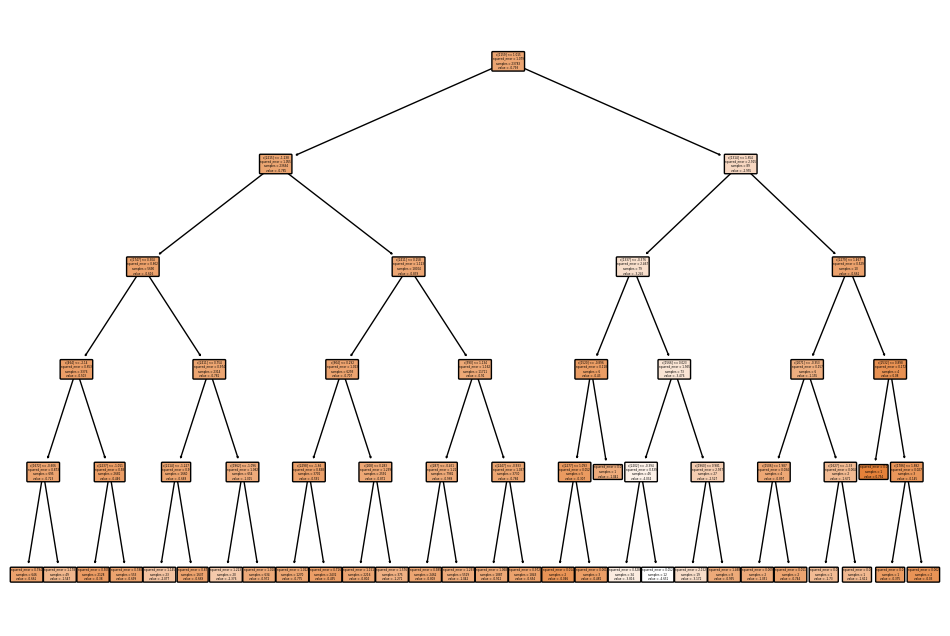

Mean Squared Error: 1.0181106058364136
R-squared: 0.03239892349138784


In [ ]:


# Assuming you have X_train, y_train, X_test, y_test defined

# Create and train the DecisionTreeRegressor model
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()

# Make predictions on the test set
predictions = model.predict(X_valid)

# Measure performance
mse = mean_squared_error(y_valid, predictions)
r2 = r2_score(y_valid, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
